In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
market_data = pd.read_csv('Simulated_Market_Growth.csv', parse_dates=['Year'], index_col='Year')

In [3]:
market_data.head()

,Market_Size
Year,
2000-12-31,500.000000
2001-12-31,568.727006
2002-12-31,679.669397
2003-12-31,797.387724
2004-12-31,924.862789


In [4]:
market_data.shape

(21, 1)

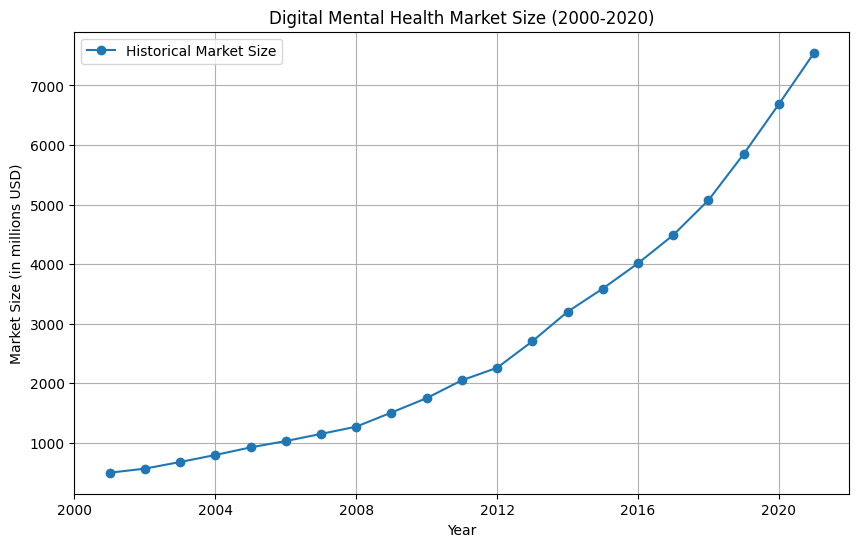

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(market_data, label="Historical Market Size", marker='o')
plt.title("Digital Mental Health Market Size (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Market Size (in millions USD)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
model = ARIMA(market_data, order=(1, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [8]:
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

In [9]:
forecast_result = model_fit.get_forecast(steps=forecast_steps)
conf_int = forecast_result.conf_int()
stderr = forecast_result.se_mean

In [10]:
forecast_years = pd.date_range(start='2021', periods=forecast_steps, freq='Y')

<ipython-input-10-5db03cc9fd9a>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start='2021', periods=forecast_steps, freq='Y')


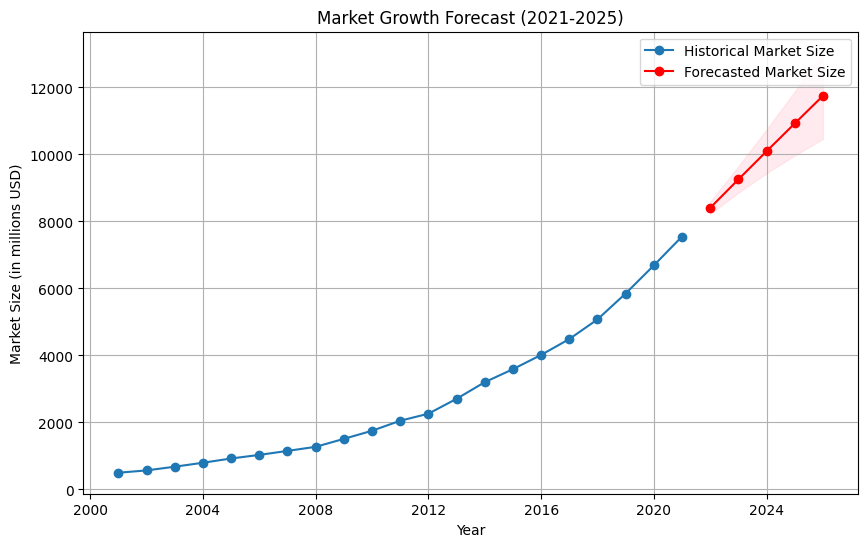

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(market_data, label="Historical Market Size", marker='o')
plt.plot(forecast_years, forecast, label="Forecasted Market Size", color='red', marker='o')

lower_conf = conf_int['lower Market_Size']
upper_conf = conf_int['upper Market_Size']

plt.fill_between(forecast_years, lower_conf, upper_conf, color='pink', alpha=0.3)
plt.title("Market Growth Forecast (2021-2025)")
plt.xlabel("Year")
plt.ylabel("Market Size (in millions USD)")
plt.legend()
plt.grid(True)
plt.show()

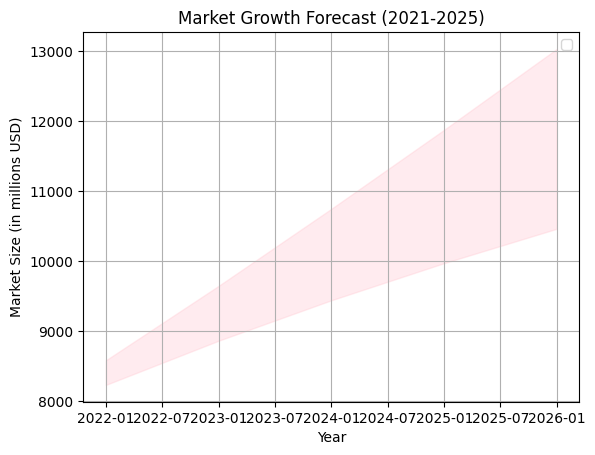

In [14]:
plt.fill_between(forecast_years, lower_conf, upper_conf, color='pink', alpha=0.3)
plt.title("Market Growth Forecast (2021-2025)")
plt.xlabel("Year")
plt.ylabel("Market Size (in millions USD)")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
forecast_results = pd.DataFrame({'Year': forecast_years, 'Forecasted_Market_Size': forecast})
print(forecast_results)

                 Year  Forecasted_Market_Size
2021-12-31 2021-12-31             8405.676508
2022-12-31 2022-12-31             9253.300338
2023-12-31 2023-12-31            10093.136677
2024-12-31 2024-12-31            10925.257072
2025-12-31 2025-12-31            11749.732412
